# Example applications of linear regression

When analyzing data, it's often important to go beyond simply applying an analysis tool to one or more columns in a dataframe.  Often, more useful, interesting, and important analyses can be done on *subsets* of the data and/or *generated* columns.  This notebook contains several examples of using simple linear regression to perform a variety of analyses on the Broadway data set that go beyond simply applying it to two numeric columns from the complete dataset.

## Imports and definitions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class SimpleLinearRegression:
    # definition omitted -- see Moodle for code

Load our data:

In [3]:
df = pd.read_csv("broadway.csv")

## Regression of Attendance vs Gross Revenue [entire dataframe]

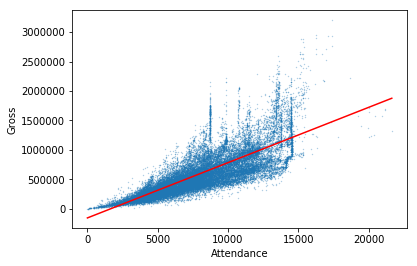

Slope: 94.02750409318983   Intercept: -157140.67106568743


In [4]:
fitter = SimpleLinearRegression(df, "Attendance", "Gross")
fitter.calc_fit()
fitter.plot()
print("Slope: {}   Intercept: {}".format(fitter.slope, fitter.intercept))

## Separate regressions for each type of show

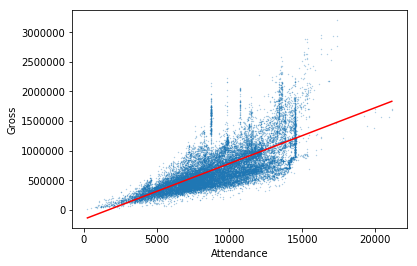

Slope: 94.23391965802662   Intercept: -160123.95363467967


In [5]:
df_musicals = df.query("Type == 'Musical'")
fitter = SimpleLinearRegression(df_musicals, "Attendance", "Gross")
fitter.calc_fit()
fitter.plot()
print("Slope: {}   Intercept: {}".format(fitter.slope, fitter.intercept))

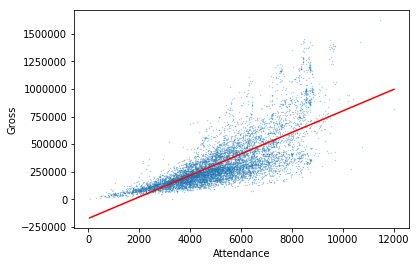

Slope: 97.54401850866853   Intercept: -173911.09052704065


In [6]:
df_plays = df.query("Type == 'Play'")
fitter = SimpleLinearRegression(df_plays, "Attendance", "Gross")
fitter.calc_fit()
fitter.plot()
print("Slope: {}   Intercept: {}".format(fitter.slope, fitter.intercept))

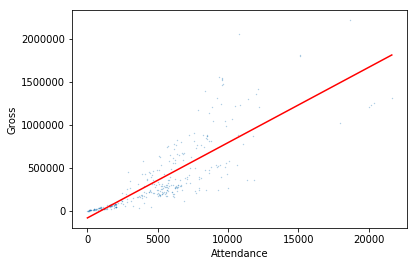

Slope: 87.64906310624892   Intercept: -82275.44904633646


In [7]:
df_specials = df.query("Type == 'Special'")
fitter = SimpleLinearRegression(df_specials, "Attendance", "Gross")
fitter.calc_fit()
fitter.plot()
print("Slope: {}   Intercept: {}".format(fitter.slope, fitter.intercept))

## Regressions for each year of data

Year      Slope  Intercept
---- ---------- ----------
1991     55.396      -7581
1992     61.761    -145954
1993     57.436    -141996
1994     61.346    -151692
1995     64.309    -141703
1996     59.840     -99645
1997     59.329     -89739
1998     61.617     -96944
1999     60.811     -76015
2000     65.539     -81831
2001     73.284    -130195
2002     81.816    -150072
2003     81.898    -125594
2004     82.046    -124292
2005     84.107    -120078
2006     95.468    -158875
2007     97.629    -168698
2008     99.476    -177264
2009    109.570    -215634
2010    117.054    -245279
2011    119.242    -246565
2012    136.427    -322329
2013    136.855    -281342
2014    134.121    -245315
2015    135.271    -251883
2016    147.027    -371815


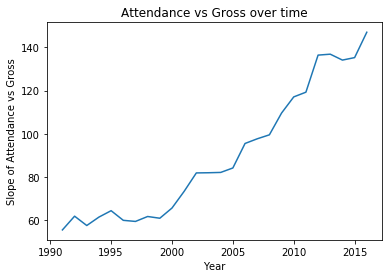

In [8]:
# collect all of the years and slopes to plot later
years = []
slopes = []

# Print a table of values as we go, starting with this header
print("{:4} {:>10} {:>10}".format("Year", "Slope", "Intercept"))
print("---- ---------- ----------")

for year in df['Year'].unique():
    df_year = df.query("Year == {}".format(year))
    
    # one year has only one point, but linear regression requires at least two, so skip that year
    if len(df_year) == 1:
        continue
    
    fit_year = SimpleLinearRegression(df_year, "Attendance", "Gross")
    fit_year.calc_fit()
    print("{:4} {:10.3f} {:10.0f}".format(year, fit_year.slope, fit_year.intercept))
    #fit_year.plot()

    years.append(year)
    slopes.append(fit_year.slope)

    
plt.plot(years, slopes)
plt.xlabel("Year")
plt.ylabel("Slope of Attendance vs Gross")
plt.title("Attendance vs Gross over time")
plt.show()

## Going a step farther:  Calculating a regression based on generated/calculated data

Now that we have data on the expected price per ticket in each year (the slopes from our regression above), we might want to make a predication based on *that* data.  For example, what if we wanted to predict the ticket price for a year that isn't in the data (which ends in 2016)?

We first to have make a dataframe from our calculated data, becuase the SimpleLinearRegression class works with dataframes, not with plain Python lists:

In [9]:
# Build a dataframe of our calculated data
df_prices = pd.DataFrame()
df_prices['year'] = years
df_prices['slope'] = slopes
df_prices

,year,slope
0,1991,55.396376
1,1992,61.760785
2,1993,57.435682
3,1994,61.345669
4,1995,64.308751
5,1996,59.839801
6,1997,59.329135
7,1998,61.617444
8,1999,60.810779
9,2000,65.539356


Then we can apply the SimpleLinearRegression class to that new dataframe to find a best-fit trend line for expected prices over time:

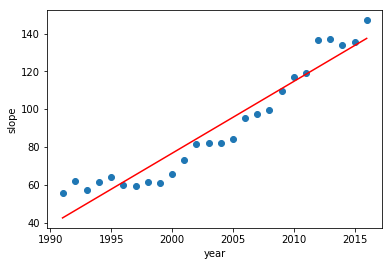

Slope: 3.79900215036819   Intercept: -7521.3517756805995


In [10]:
fit_prices = SimpleLinearRegression(df_prices, "year", "slope")
fit_prices.calc_fit()
fit_prices.plot(fullsize=True)
print("Slope: {}   Intercept: {}".format(fit_prices.slope, fit_prices.intercept))

Our prediction can then be made using the `.predict()` method in the SimpleLinearRegression class.

In [11]:
fit_prices.predict(2019)

148.83356591277607

But notice that the prediction for 2019 is only a tiny bit above the value for 2016.  Surely it would go up more than that?  This comes because the predction for 2016 itself is well below the actual value, because the trend line contains the period of flat prices in the 1990s.

We might decide to just look at the period in which prices *have* been increasing, since roughly 2000, judging by the plot.  **This sort of data selection is dangerous**, because we are now biasing the analysis in a particular way that may make our results misleading or invalid.  In particular, we might be tempted to select *just* the parts of the data for which an analysis produces whatever conclusion we want.  There are ethical issues involved in choosing *how* one analyzes data, therefore.

For the sake of having an example, though, here we use our well-worn `.query()` tool to select just the years since 2000 and re-run the fit and prediction:

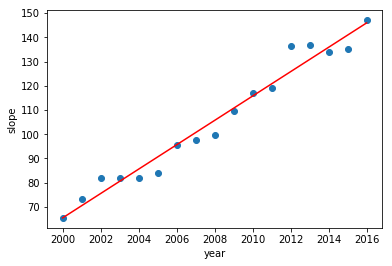

Slope: 5.0305703252503395   Intercept: -9995.689305745995


In [12]:
# Let's look at just the years since 2000
df_price_recent = df_prices.query("year >= 2000")
fit_prices = SimpleLinearRegression(df_price_recent, "year", "slope")
fit_prices.calc_fit()
fit_prices.plot(fullsize=True)
print("Slope: {}   Intercept: {}".format(fit_prices.slope, fit_prices.intercept))

In [13]:
fit_prices.predict(2019)

161.03218093444048

Now the prediction seems more sensible, given the trend since 2000, not counting the flat period beforehand.  (But again, be **careful** when making these sorts of choices in data analysis!)